In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## cargar datos y algunos formatos

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-1m.zip',
        tmpdir + '/ml-1m.zip')
    zipfile.ZipFile(tmpdir + '/ml-1m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-1m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-1m/ratings.dat',
        sep='::',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-1m/users.dat',
        sep='::',
        names=['USER_ID','GENDER','AGE','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-1m/movies.dat',
        sep='::', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'GENRES'],
    )

movies.dat
ratings.dat
README
users.dat



/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warni

## ejecutar diagnósticos

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
        USER_ID  ITEM_ID  RATING  TIMESTAMP
469615     2893     3827       3  971998397
581637     3553     2841       4  966813741
449938     2774     1387       4  973098874
562035     3458     2297       4  967224700
19908       149     3178       4  993154261
491979     3026     3255       3  970462119
653316     3939      527       4  965697418
102035      678     2463       4  988637609
658721     3969     3324       5  965660410
765742     4560     1827       4  964648658

=== Interactions table, original shape=(1000209, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (1000209, 4)
duplication rate 0.0
drop_duplicates shape (1000209, 4)
user item repeat rate 0.0

=== Describe interactions table ===

             RATING     TIMESTAMP
count  1.000209e+06  1.000209e+06
mean   3.581564e+00  9.722437e+08
std    1.117102e+00  1.2

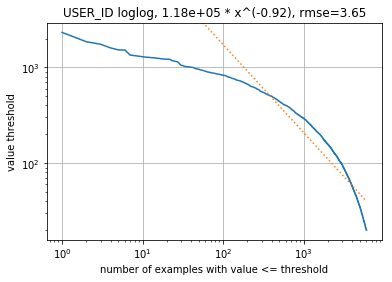


=== ITEM_ID top 10 categories ===
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
dtype: int64


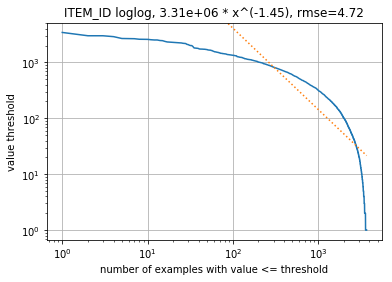


=== Hourly activity pattern ===
0     55397
1     58223
2     59068
3     62396
4     55443
5     42064
6     33987
7     27519
8     20547
9     12959
10     9370
11     8617
12    13221
13    20917
14    28865
15    40385
16    48954
17    53565
18    59138
19    59201
20    59709
21    65491
22    55098
23    50075
dtype: int64

=== Day of week activity pattern ===
0    173931
1    159272
2    141176
3    142722
4    129438
5    108692
6    144978
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


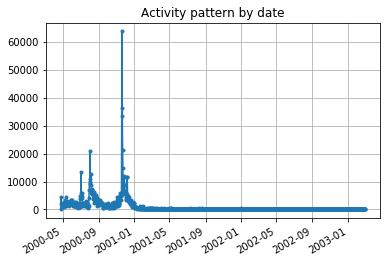

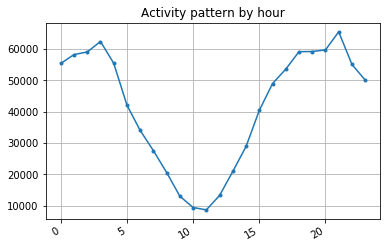

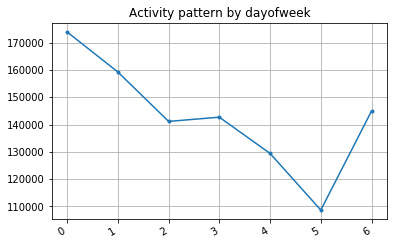


=== Temporal shift analysis ===

temporal total variation, freq=5d, hist_len=0, avg_loss=29.4%, time=1.3s
temporal total variation, freq=5d, hist_len=1, avg_loss=23.9%, time=1.1s
temporal total variation, freq=5d, hist_len=10, avg_loss=20.0%, time=1.0s
temporal total variation, freq=5d, hist_len=100, avg_loss=20.3%, time=1.1s
temporal total variation, freq=5d, hist_len=1000, avg_loss=20.3%, time=1.1s


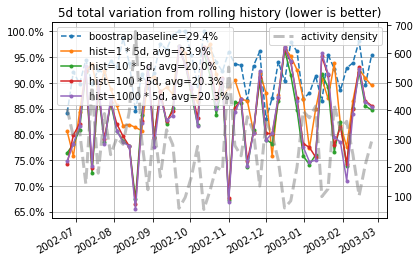

temporal total variation, freq=1d, hist_len=0, avg_loss=49.7%, time=1.5s
temporal total variation, freq=1d, hist_len=1, avg_loss=40.9%, time=1.1s
temporal total variation, freq=1d, hist_len=10, avg_loss=33.5%, time=1.3s
temporal total variation, freq=1d, hist_len=100, avg_loss=33.3%, time=1.5s
temporal total variation, freq=1d, hist_len=1000, avg_loss=33.4%, time=1.8s


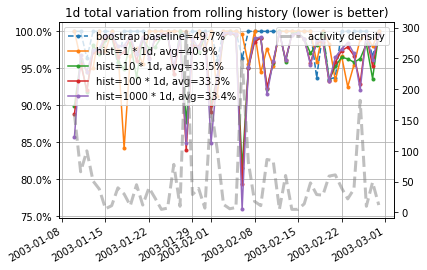

temporal total variation, freq=3h, hist_len=0, avg_loss=76.1%, time=1.7s
temporal total variation, freq=3h, hist_len=1, avg_loss=68.3%, time=1.4s
temporal total variation, freq=3h, hist_len=10, avg_loss=58.6%, time=1.7s
temporal total variation, freq=3h, hist_len=100, avg_loss=57.4%, time=3.0s
temporal total variation, freq=3h, hist_len=1000, avg_loss=57.6%, time=6.4s


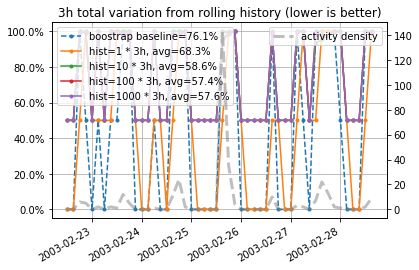


=== session time delta describe ===
count    9.941690e+05
mean     4.986574e+04
std      9.525371e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+01
max      8.892327e+07
Name: TIMESTAMP, dtype: float64


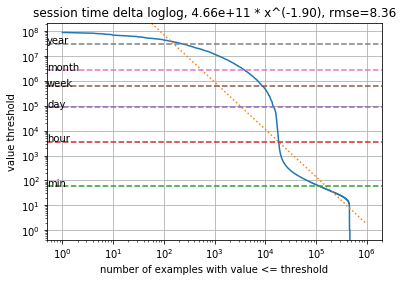

=== user time span describe ===
count    6.040000e+03
mean     8.207777e+06
std      1.917298e+07
min      1.060000e+02
25%      1.207500e+03
50%      4.068500e+03
75%      2.021375e+06
max      8.924779e+07
Name: TIMESTAMP, dtype: float64


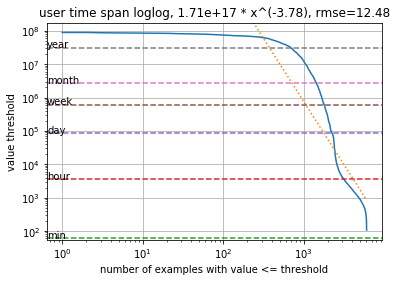

########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
      USER_ID GENDER  AGE  OCCUPATION     ZIPCODE
752       753      M    1          10       42754
4608     4609      F   25           4       53951
978       979      M    1          10       48073
160       161      M   45          16  98107-2117
1991     1992      M   18           4       85259
527       528      F   18          17       83843
5847     5848      M   50          20       20009
73         74      M   35          14       94530
5539     5540      M   35           1       19149
4278     4279      M   25          16       43215

=== Users table, original shape=(6040, 5) ===

Missing rate of all user meta-data 0.0
User coldstart rate 0.0

=== Describe  ===

               AGE   OCCUPATION
count  6040.000000  6040.000000
mean     30.639238     8.146854
std      12.895962     6.329511
min       1.000000     0.000000
25%      25.000000     3.000000
50%      25

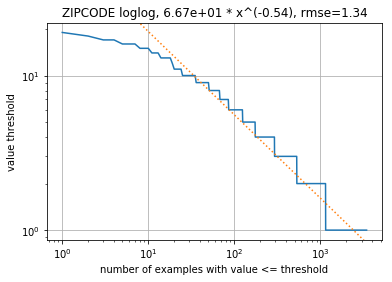

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:74: UserWarning: 
            Heavy-tail ZIPCODE distributions are usually hard to learn (slope=-0.5392588567551565)!
            Consider rolling up ZIPCODE or dropping its rare values.
            
  """.format(name, slope))


########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                           _TITLE  \
816       827                Convent, The (Convento, O) (1995)   
379       383                                Wyatt Earp (1994)   
3776     3846                                Easy Money (1983)   
1006     1019              20,000 Leagues Under the Sea (1954)   
1495     1532                                    Sprung (1997)   
1517     1556                   Speed 2: Cruise Control (1997)   
2087     2156  Best Man, The (Il Testimone dello sposo) (1997)   
2876     2945                             Mike's Murder (1984)   
2868     2937                     Palm Beach Story, The (1942)   
1614     1660                               Eve's Bayou (1997)   

                                   GENRES  
816                                 Drama  
379                               Western  
3776                     

/home/yifeim/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


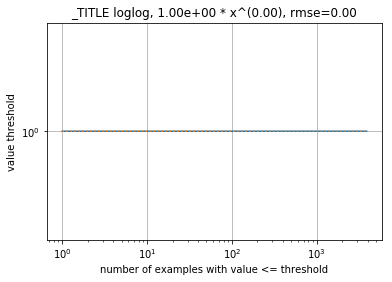


=== GENRES top 10 categories ===
Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
dtype: int64
CREATION_TIMESTAMP not found in items table


/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:74: UserWarning: 
            Heavy-tail _TITLE distributions are usually hard to learn (slope=0.0)!
            Consider rolling up _TITLE or dropping its rare values.
            
  """.format(name, slope))


In [3]:
diagnose(interactions, users, items)